In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [67]:
train = pd.read_csv("train.csv")
pd.set_option("display.max_columns",None) #showing all the columns

In [68]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [69]:
train.info() #info of dtypes and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
train = train.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1) #

In [89]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<AxesSubplot:>

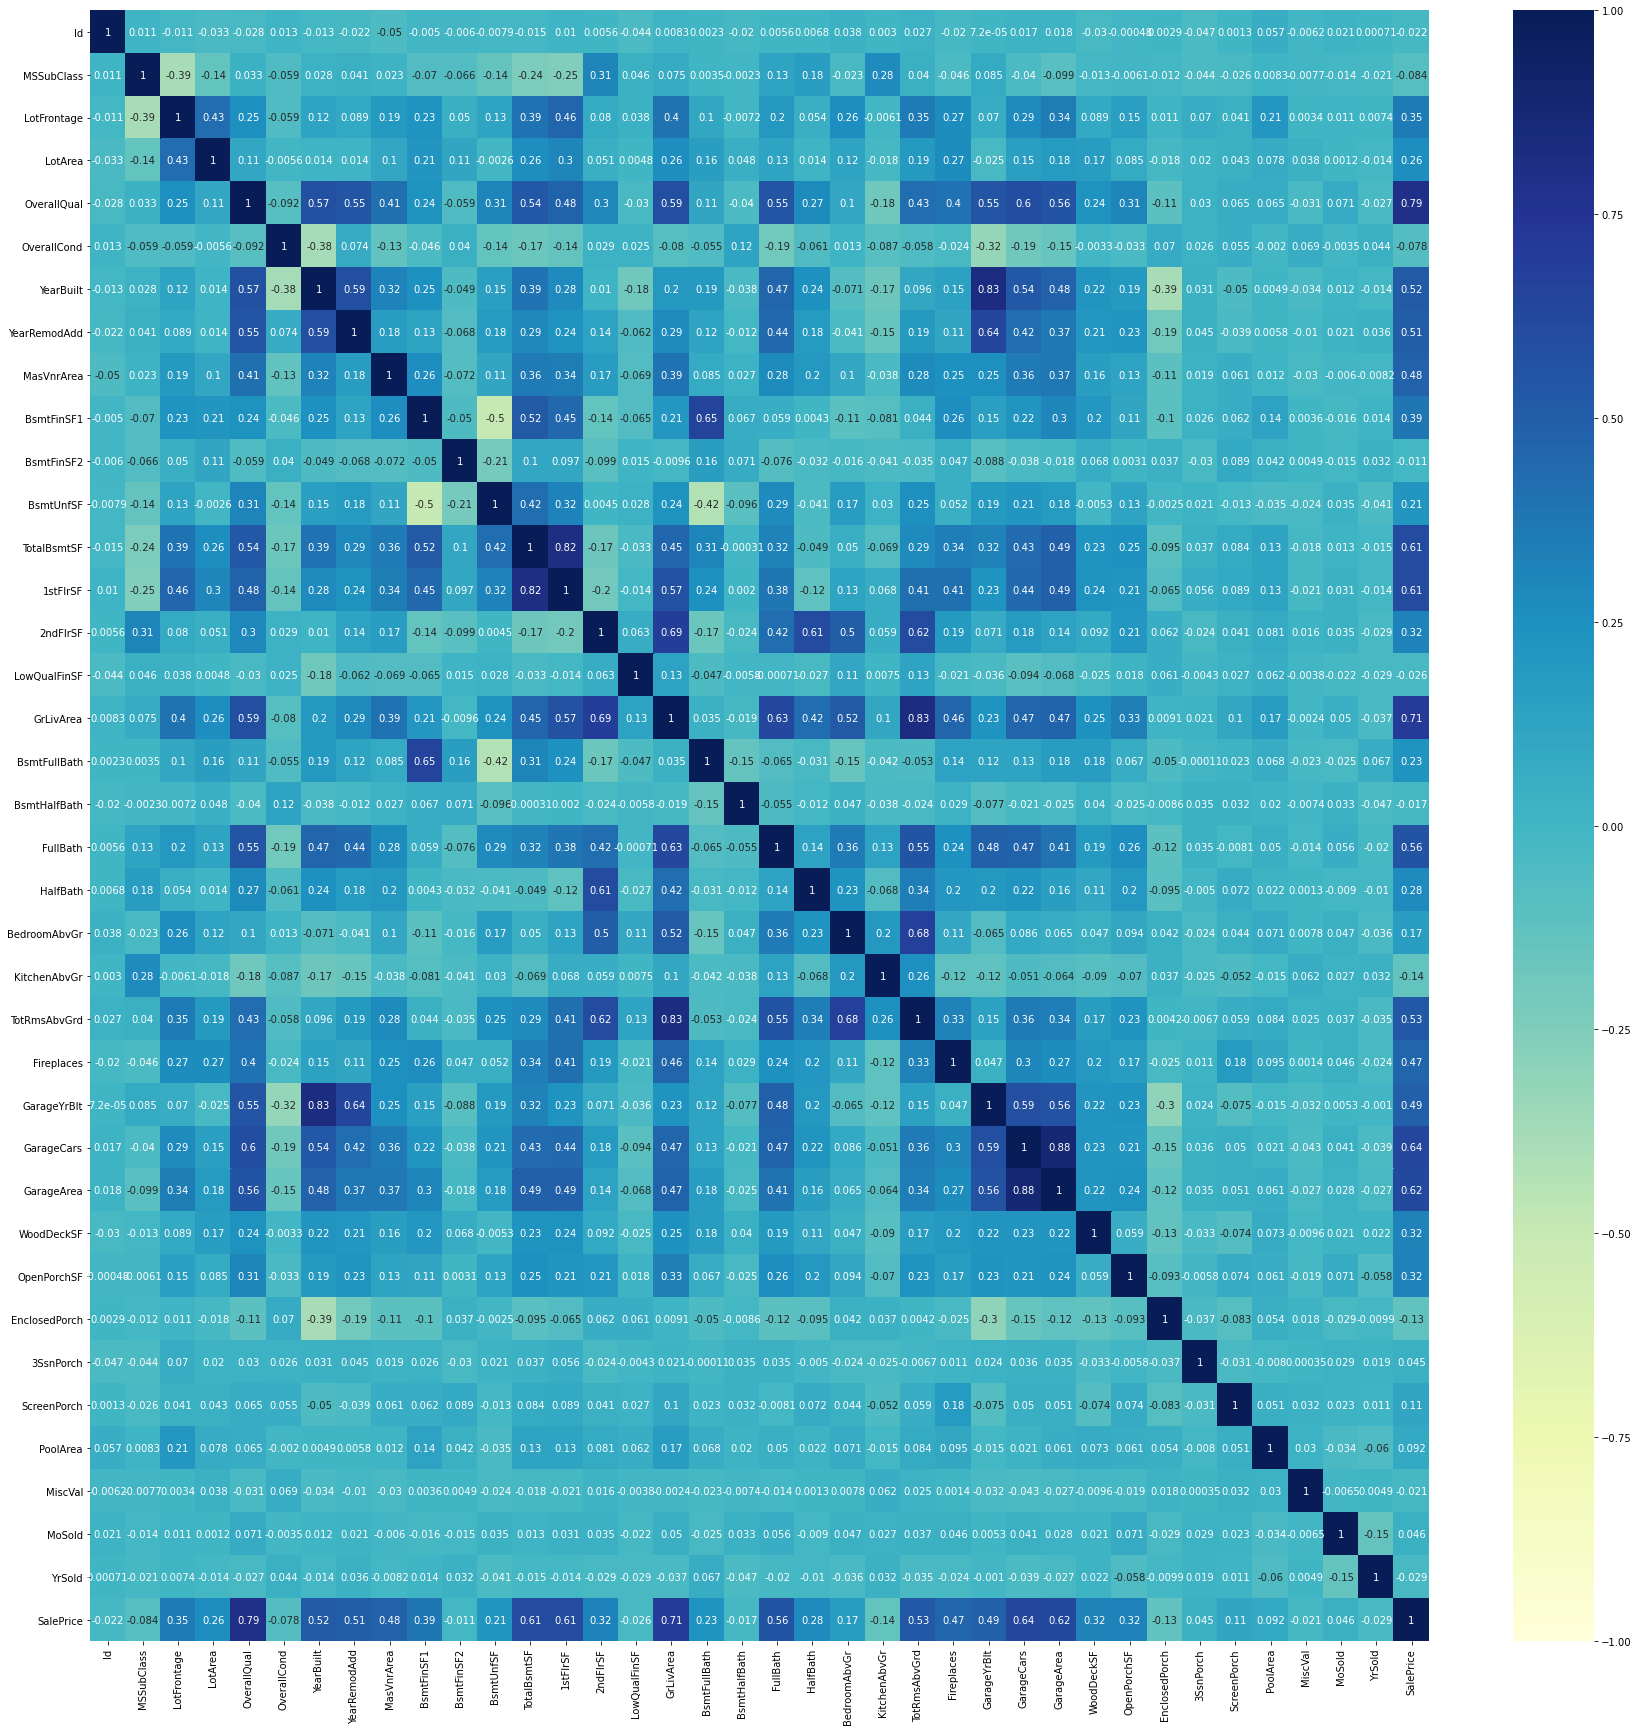

In [96]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),vmin=-1, vmax=1, cmap="YlGnBu", annot=True)

**Find the correlated columns with SalePrice**

In [90]:
fltr = pd.DataFrame(train.corrwith(train['SalePrice']),columns =["correlation"]).reset_index()

In [95]:
fltr.head()

,index,correlation
4,OverallQual,0.790982
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852


In [93]:
fltr = fltr[(fltr["correlation"] >= 0.50)  | (fltr["correlation"] < -0.50)]
fltr

,index,correlation
4,OverallQual,0.790982
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
16,GrLivArea,0.708624
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
26,GarageCars,0.640409
27,GarageArea,0.623431


In [41]:
correlated_columns = fltr["index"].tolist()

In [42]:
print(correlated_columns)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [80]:
# getting numberic columns from our findings
numeric_columns = train.select_dtypes(include=np.number).columns.tolist()
# numeric_columns

In [82]:
train_numeric = train[numeric_columns]
# train_numeric

**Find the Binary Columns**

In [45]:
binary= train_numeric.max() - train_numeric.min()
binary[binary==1]

Series([], dtype: float64)

**Find the Categorical/Object Columns**

In [87]:
# we have to remove the numeric columns from the main dataframe(train)
object_columns = list(set(train.columns) - set(numeric_columns))
# object_columns

In [47]:
train[object_columns]

,GarageQual,HeatingQC,RoofStyle,LotShape,Heating,SaleType,Condition2,MSZoning,Condition1,RoofMatl,Foundation,SaleCondition,BsmtCond,GarageType,Neighborhood,LandContour,ExterCond,BsmtFinType1,LandSlope,BldgType,Utilities,GarageFinish,Exterior1st,GarageCond,KitchenQual,LotConfig,Street,CentralAir,BsmtQual,Functional,ExterQual,MasVnrType,PavedDrive,HouseStyle,BsmtExposure,BsmtFinType2,Electrical,Exterior2nd
0,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,CollgCr,Lvl,TA,GLQ,Gtl,1Fam,AllPub,RFn,VinylSd,TA,Gd,Inside,Pave,Y,Gd,Typ,Gd,BrkFace,Y,2Story,No,Unf,SBrkr,VinylSd
1,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Feedr,CompShg,CBlock,Normal,TA,Attchd,Veenker,Lvl,TA,ALQ,Gtl,1Fam,AllPub,RFn,MetalSd,TA,TA,FR2,Pave,Y,Gd,Typ,TA,None,Y,1Story,Gd,Unf,SBrkr,MetalSd
2,TA,Ex,Gable,IR1,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,CollgCr,Lvl,TA,GLQ,Gtl,1Fam,AllPub,RFn,VinylSd,TA,Gd,Inside,Pave,Y,Gd,Typ,Gd,BrkFace,Y,2Story,Mn,Unf,SBrkr,VinylSd
3,TA,Gd,Gable,IR1,GasA,WD,Norm,RL,Norm,CompShg,BrkTil,Abnorml,Gd,Detchd,Crawfor,Lvl,TA,ALQ,Gtl,1Fam,AllPub,Unf,Wd Sdng,TA,Gd,Corner,Pave,Y,TA,Typ,TA,None,Y,2Story,No,Unf,SBrkr,Wd Shng
4,TA,Ex,Gable,IR1,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,NoRidge,Lvl,TA,GLQ,Gtl,1Fam,AllPub,RFn,VinylSd,TA,Gd,FR2,Pave,Y,Gd,Typ,Gd,BrkFace,Y,2Story,Av,Unf,SBrkr,VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,Gilbert,Lvl,TA,Unf,Gtl,1Fam,AllPub,RFn,VinylSd,TA,TA,Inside,Pave,Y,Gd,Typ,TA,None,Y,2Story,No,Unf,SBrkr,VinylSd
1456,TA,TA,Gable,Reg,GasA,WD,Norm,RL,Norm,CompShg,CBlock,Normal,TA,Attchd,NWAmes,Lvl,TA,ALQ,Gtl,1Fam,AllPub,Unf,Plywood,TA,TA,Inside,Pave,Y,Gd,Min1,TA,Stone,Y,1Story,No,Rec,SBrkr,Plywood
1457,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Norm,CompShg,Stone,Normal,Gd,Attchd,Crawfor,Lvl,Gd,GLQ,Gtl,1Fam,AllPub,RFn,CemntBd,TA,Gd,Inside,Pave,Y,TA,Typ,Ex,None,Y,2Story,No,Unf,SBrkr,CmentBd
1458,TA,Gd,Hip,Reg,GasA,WD,Norm,RL,Norm,CompShg,CBlock,Normal,TA,Attchd,NAmes,Lvl,TA,GLQ,Gtl,1Fam,AllPub,Unf,MetalSd,TA,Gd,Inside,Pave,Y,TA,Typ,TA,None,Y,1Story,Mn,Rec,FuseA,MetalSd


In [76]:
correlated_columns.extend(object_columns)

**Filtered Dataset**

In [88]:
train2 = train[correlated_columns]
train2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,GarageQual,HeatingQC,RoofStyle,LotShape,Heating,SaleType,Condition2,MSZoning,Condition1,RoofMatl,Foundation,SaleCondition,BsmtCond,GarageType,Neighborhood,LandContour,ExterCond,BsmtFinType1,LandSlope,BldgType,Utilities,GarageFinish,Exterior1st,GarageCond,KitchenQual,LotConfig,Street,CentralAir,BsmtQual,Functional,ExterQual,MasVnrType,PavedDrive,HouseStyle,BsmtExposure,BsmtFinType2,Electrical,Exterior2nd,BsmtFinType2,GarageQual,HeatingQC,RoofStyle,Heating,SaleType,LotShape,Condition2,MSZoning,FireplaceQu,Condition1,RoofMatl,Foundation,BsmtCond,SaleCondition,GarageType,Neighborhood,LandContour,Alley,ExterCond,PoolQC,BsmtFinType1,BldgType,Utilities,GarageFinish,GarageCond,Exterior1st,KitchenQual,LotConfig,Street,CentralAir,MiscFeature,BsmtQual,Functional,ExterQual,MasVnrType,PavedDrive,HouseStyle,BsmtExposure,Fence,LandSlope,Electrical,Exterior2nd
0,7,2003,2003,856,856,1710,2,8,2,548,208500,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,CollgCr,Lvl,TA,GLQ,Gtl,1Fam,AllPub,RFn,VinylSd,TA,Gd,Inside,Pave,Y,Gd,Typ,Gd,BrkFace,Y,2Story,No,Unf,SBrkr,VinylSd,Unf,TA,Ex,Gable,GasA,WD,Reg,Norm,RL,NaN,Norm,CompShg,PConc,TA,Normal,Attchd,CollgCr,Lvl,NaN,TA,NaN,GLQ,1Fam,AllPub,RFn,TA,VinylSd,Gd,Inside,Pave,Y,NaN,Gd,Typ,Gd,BrkFace,Y,2Story,No,NaN,Gtl,SBrkr,VinylSd
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Feedr,CompShg,CBlock,Normal,TA,Attchd,Veenker,Lvl,TA,ALQ,Gtl,1Fam,AllPub,RFn,MetalSd,TA,TA,FR2,Pave,Y,Gd,Typ,TA,None,Y,1Story,Gd,Unf,SBrkr,MetalSd,Unf,TA,Ex,Gable,GasA,WD,Reg,Norm,RL,TA,Feedr,CompShg,CBlock,TA,Normal,Attchd,Veenker,Lvl,NaN,TA,NaN,ALQ,1Fam,AllPub,RFn,TA,MetalSd,TA,FR2,Pave,Y,NaN,Gd,Typ,TA,None,Y,1Story,Gd,NaN,Gtl,SBrkr,MetalSd
2,7,2001,2002,920,920,1786,2,6,2,608,223500,TA,Ex,Gable,IR1,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,CollgCr,Lvl,TA,GLQ,Gtl,1Fam,AllPub,RFn,VinylSd,TA,Gd,Inside,Pave,Y,Gd,Typ,Gd,BrkFace,Y,2Story,Mn,Unf,SBrkr,VinylSd,Unf,TA,Ex,Gable,GasA,WD,IR1,Norm,RL,TA,Norm,CompShg,PConc,TA,Normal,Attchd,CollgCr,Lvl,NaN,TA,NaN,GLQ,1Fam,AllPub,RFn,TA,VinylSd,Gd,Inside,Pave,Y,NaN,Gd,Typ,Gd,BrkFace,Y,2Story,Mn,NaN,Gtl,SBrkr,VinylSd
3,7,1915,1970,756,961,1717,1,7,3,642,140000,TA,Gd,Gable,IR1,GasA,WD,Norm,RL,Norm,CompShg,BrkTil,Abnorml,Gd,Detchd,Crawfor,Lvl,TA,ALQ,Gtl,1Fam,AllPub,Unf,Wd Sdng,TA,Gd,Corner,Pave,Y,TA,Typ,TA,None,Y,2Story,No,Unf,SBrkr,Wd Shng,Unf,TA,Gd,Gable,GasA,WD,IR1,Norm,RL,Gd,Norm,CompShg,BrkTil,Gd,Abnorml,Detchd,Crawfor,Lvl,NaN,TA,NaN,ALQ,1Fam,AllPub,Unf,TA,Wd Sdng,Gd,Corner,Pave,Y,NaN,TA,Typ,TA,None,Y,2Story,No,NaN,Gtl,SBrkr,Wd Shng
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,TA,Ex,Gable,IR1,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,NoRidge,Lvl,TA,GLQ,Gtl,1Fam,AllPub,RFn,VinylSd,TA,Gd,FR2,Pave,Y,Gd,Typ,Gd,BrkFace,Y,2Story,Av,Unf,SBrkr,VinylSd,Unf,TA,Ex,Gable,GasA,WD,IR1,Norm,RL,TA,Norm,CompShg,PConc,TA,Normal,Attchd,NoRidge,Lvl,NaN,TA,NaN,GLQ,1Fam,AllPub,RFn,TA,VinylSd,Gd,FR2,Pave,Y,NaN,Gd,Typ,Gd,BrkFace,Y,2Story,Av,NaN,Gtl,SBrkr,VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,TA,Ex,Gable,Reg,GasA,WD,Norm,RL,Norm,CompShg,PConc,Normal,TA,Attchd,Gilbert,Lvl,TA,Unf,Gtl,1Fam,AllPub,RFn,VinylSd,TA,TA,Inside,Pave,Y,Gd,Typ,TA,None,Y,2Story,No,Unf,SBrkr,VinylSd,Unf,TA,Ex,Gable,GasA,WD,Reg,Norm,RL,TA,Norm,CompShg,PConc,TA,Normal,Attchd,Gilbert,Lvl,NaN,TA,NaN,Unf,1Fam,AllPub,RFn,TA,VinylSd,TA,Inside,Pave,Y,NaN,Gd,Typ,TA,None,Y,2Story,No,NaN,Gtl,SBrkr,VinylSd
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,TA,TA,Gable,Reg,GasA,WD,Norm,RL,Norm,Comp

In [50]:
train2  = train2[sorted(train2.columns)]

In [51]:
train2 = train2.dropna(axis=0).reset_index()

In [52]:
del train2["index"]

**Heat Map**

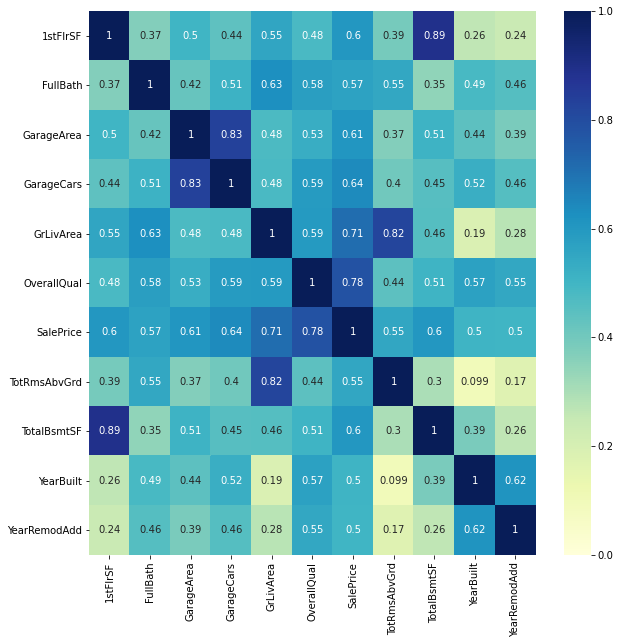

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(train2.corr(),vmin=0,vmax=1,annot=True,cmap="YlGnBu")
plt.show()

**1stFlrSF:** First Floor square feet

**FullBath:** Full bathrooms above grade

**GarageArea:** Size of garage in square feet

**Garage Cars:** Size of garage in car capacity

**GrLivArea:** Above grade (ground) living area square feet

**OveralQual:** Rates the overall material and finish of the house

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)**

**YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)

**Scatter Plot**

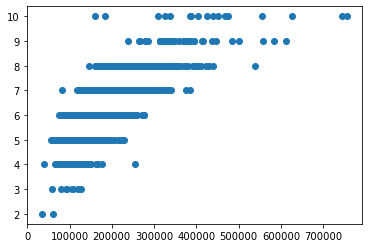

In [54]:
plt.scatter(train2["SalePrice"],train2["OverallQual"])

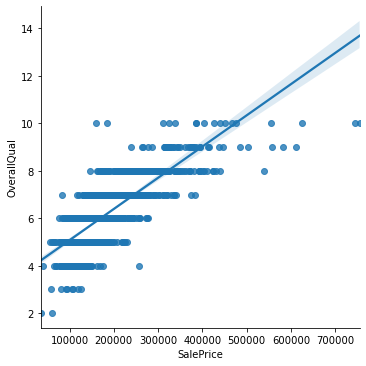

In [55]:
sns.lmplot(data=train2, x = 'SalePrice', y='OverallQual')

In [56]:
y= train2['SalePrice']
x= train2['OverallQual']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2125.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          2.12e-278
Time:                        16:04:26   Log-Likelihood:                -16349.
No. Observations:                1338   AIC:                         3.270e+04
Df Residuals:                    1336   BIC:                         3.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.036e+05   6440.614    -16.086      0.000   -1.16e+05    -9.1e+04
OverallQual  4.668e+04   1012.821     46.094      0.000    4.47e+04    4.87e+04
==============================================================================
Omnibus:                      543.399   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5291.081
Skew:                           1.612   Prob(JB):                         0.00
Kurtosis:                      12.193   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y= train2['SalePrice']
x = train2[['OverallQual', 'GrLivArea']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1614.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:04:26   Log-Likelihood:                -16163.
No. Observations:                1338   AIC:                         3.233e+04
Df Residuals:                    1335   BIC:                         3.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.085e+05   5613.503    -19.322      0.000   -1.19e+05   -9.75e+04
OverallQual  3.321e+04   1096.826     30.282      0.000    3.11e+04    3.54e+04
GrLivArea      57.6508      2.791     20.659      0.000      52.176      63.125
==============================================================================
Omnibus:                      308.745   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9031.942
Skew:                           0.379   Prob(JB):                         0.00
Kurtosis:                      15.706   Cond. No.                     7.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
y= train2['SalePrice']
x = train2[['OverallQual', 'GrLivArea',  'GrLivArea']]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:00:11   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
OverallQual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
GrLivArea      27.9311      1.315     21.242      0.000      25.352      30.510
GrLivArea      27.9311      1.315     21.242      0.000      25.352      30.510
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     1.59e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.98e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""